# FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [4]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [7]:
df.shape

(1898, 9)

#### Observations:
There are 1898 rows and 9 columns in the data.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
1.   order_id, customer_id, food_preparation_time and delivery_time are of integer data type.
2.   restaurant_name, cuisine_type, day_of_the_week and rating are of object data type.
3. cost_of_the_order is the ony column with float data type.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [9]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There are no missing values in the data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [10]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
The minimum, average and maximum time taken in food preparation once an order has been placed is 20, 27.37 and 35 minutes respectively.

### **Question 5:** How many orders are not rated?

In [11]:
df['rating'].value_counts() # obtaining the number of orders under each category in rating column

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [12]:
(df.rating=='Not given').sum() # gives the count of the number of orders specifically under Not given category in the rating colum.

736

#### Observations:
736 orders have not been rated i.e their rating status is "Not given".

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

## Order ID

In [13]:
# checking unique items under order ID
df['order_id'].nunique()

1898

#### Observations:
There are 1898 unique values under the order id column and are equal to the number of rows in the data. This implies that all the items under order id column are unique.

## Customer ID

In [14]:
# checking unique items under customer id
df['customer_id'].nunique()

1200

#### Observations:
There are 1200 unique customer ids implying that 1200 customers placed their orders.

## Restaurant Name

In [15]:
# checking unique items under restaurant name
df['restaurant_name'].nunique()

178

#### Observations:
There are 178 restaurants which received the customer's orders.

## Cuisine Type

In [16]:
# Checking unique items under cuisine type
df['cuisine_type'].nunique()

14

Text(0.5, 1.0, 'Cuisine Type Count-plot')

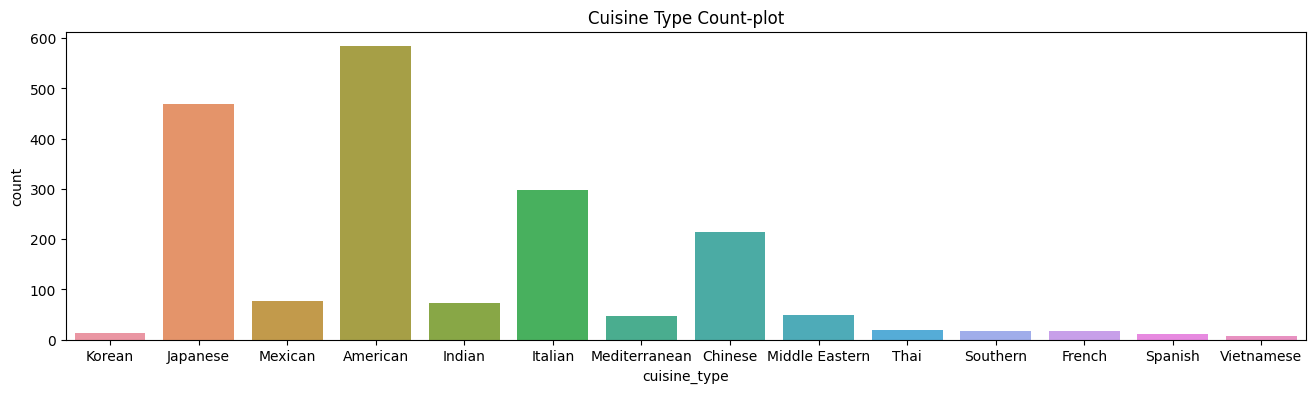

In [17]:
# Plotting a count-plot for cuisine type
plt.figure(figsize = (16,4))
sns.countplot(data = df, x ='cuisine_type')
plt.title('Cuisine Type Count-plot')

#### Observation:
1.   There are 14 cuisine types.
2.   American type is the most ordered food and Vietnamese is the least ordered.



## Cost of the order

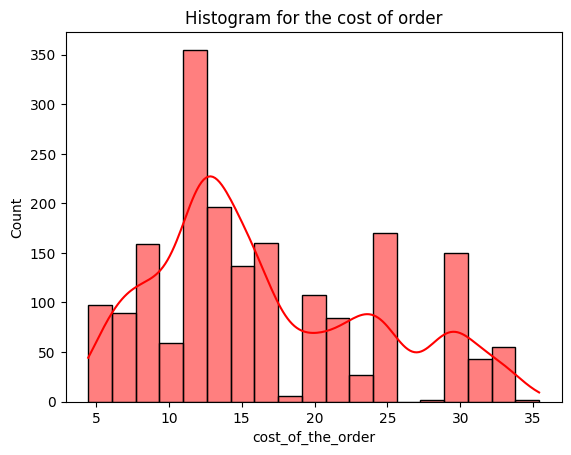

In [18]:
# Plotting a histogram for the cost of order
sns.histplot(data=df,x='cost_of_the_order', color='red',kde=True)
plt.title('Histogram for the cost of order')
plt.show()

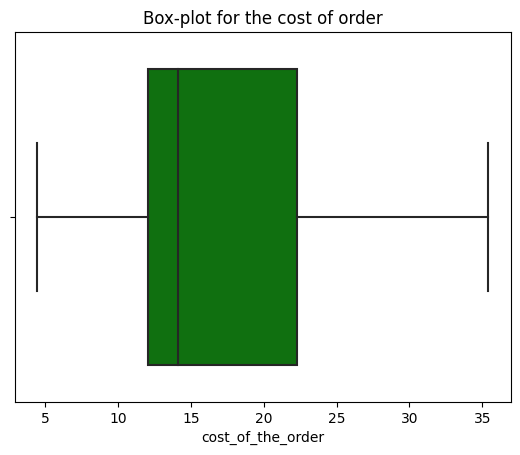

In [19]:
# Plotting a box-plot for the cost of order
sns.boxplot(data=df,x='cost_of_the_order', color='green')
plt.title('Box-plot for the cost of order')
plt.show()

#### Observations:
1.   There exist a multimodality in the cost of order.
2.   The cost of order is positively skewed.
3.   There are no outliers in the cost of the order.

## Day of the week

In [20]:
# Checking unique items under day of the week
df.day_of_the_week.nunique()

2

In [21]:
# The counts for each category under day of the week
df.day_of_the_week.value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

Text(0.5, 1.0, 'Day of the week count-plot')

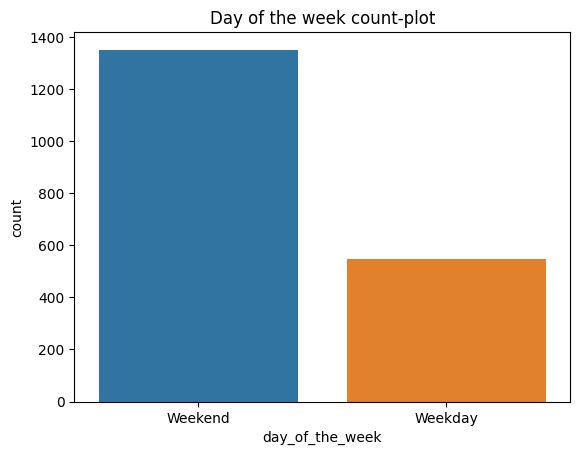

In [22]:
# Plotting a count-plot for the day of the week
sns.countplot(data = df, x = 'day_of_the_week')
plt.title('Day of the week count-plot')

#### Observations:
1.   There are 2 categories under day of the week i.e Weekend and Weekday.
2.   The frequency of weekend is 1351 while that of the weekday is 547.



## Rating

In [23]:
# Check the unique values
df.rating.nunique()

4

In [24]:
df.rating.value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

Text(0.5, 1.0, 'Count-plot for Rating')

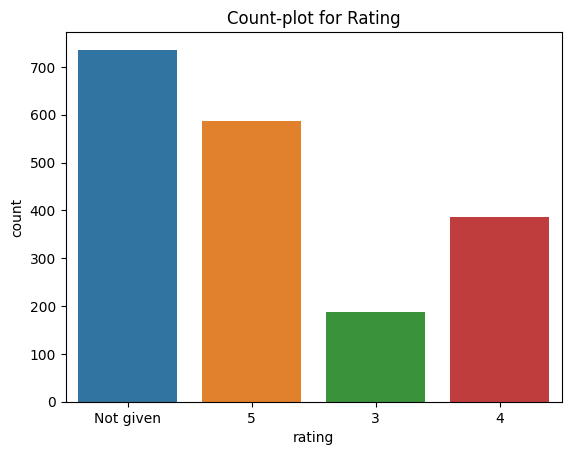

In [25]:
# Plotting a count-plot for the rating column
sns.countplot(data = df, x = 'rating')
plt.title('Count-plot for Rating')

#### Observations:
1. Rating has 4 categories namely; 3,4,5 and Not given
2. Not given category has the highest frequency (736) while the rating of 3 has the least (188).

## Food Preparation time

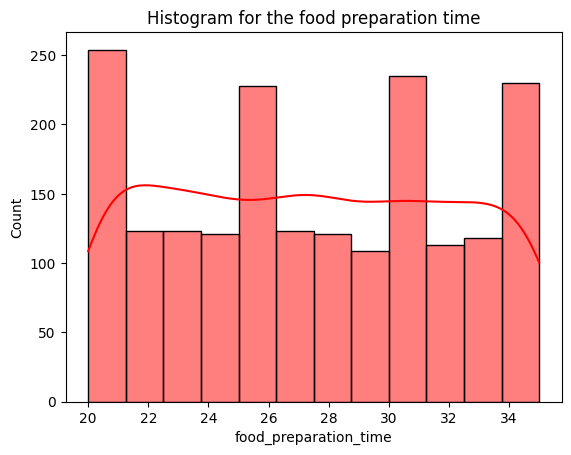

In [26]:
# Plotting a histogram for the food preparation time
sns.histplot(data=df,x='food_preparation_time', color='red',kde=True)
plt.title('Histogram for the food preparation time')
plt.show()

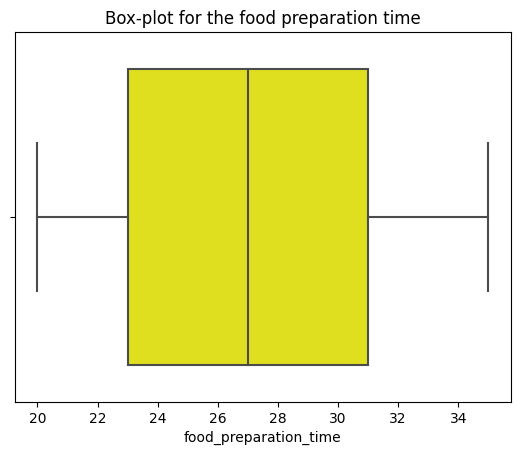

In [27]:
# Plotting a box-plot for the food preparation time
sns.boxplot(data=df,x='food_preparation_time', color='Yellow')
plt.title('Box-plot for the food preparation time')
plt.show()

#### Observations:
1. The food preparation time exhibits a uniform distribution
2. The food preparation time does not have any outliers and does not have any skewness.

## Delivery time

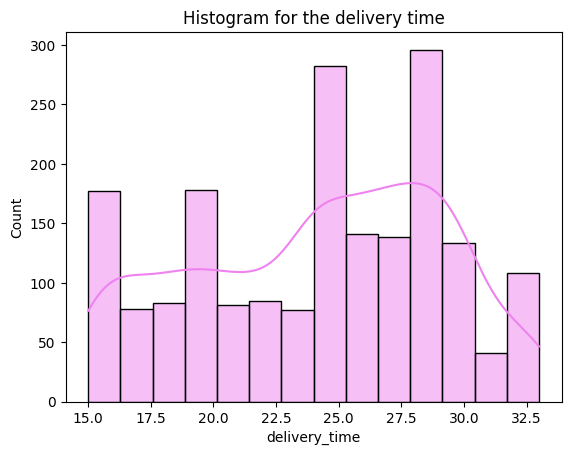

In [28]:
# Plotting a histogram for the delivery time
sns.histplot(data=df,x='delivery_time', color='Violet',kde=True)
plt.title('Histogram for the delivery time')
plt.show()

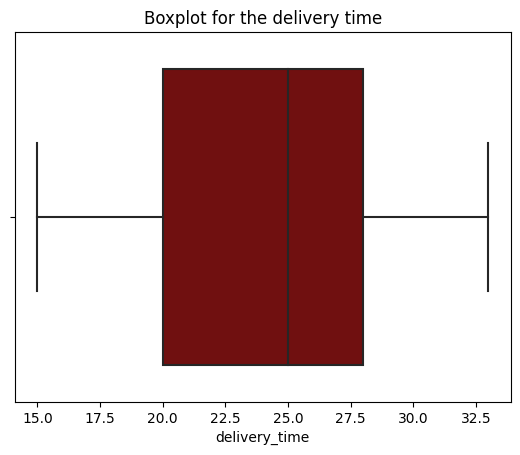

In [29]:
# Plotting a boxplot for the delivery time
sns.boxplot(data=df,x='delivery_time', color='Maroon')
plt.title('Boxplot for the delivery time')
plt.show()

#### Observation:
The delivery time is negatively skewed.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [30]:
(df.restaurant_name.value_counts()).sort_values(ascending = False)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Coppola's East                 1
Kori Restaurant and Bar        1
Woorijip                       1
Crema Restaurante              1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

#### Observations:
The top 5 restaurants in terms of the number of orders received  are as follows;
1. Shake Shack - 219
2. The Meatball Shop - 132
3. Blue Ribbon Sushi - 119
4. Blue Ribbon Fried Chicken - 96
5. Parm - 68

### **Question 8**: Which is the most popular cuisine on weekends?

In [31]:
df_weekends = df[df['day_of_the_week']=='Weekend']
df_weekends.cuisine_type.value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:
American is the most popular cuisine on weekends with 415 orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [32]:
# Obtaining the orders that are greater than 20
df_more_than_20 = df[df.cost_of_the_order>20]

In [33]:
df_more_than_20.shape[0] # obtaining the number of orders that are greater than 20

555

In [34]:
# Percentage of orders that cost more than 20 dollars
percentage_over_20_dollars = (df_more_than_20.shape[0] / df.shape[0]) * 100
print('Percentage of orders above $20 :',round(percentage_over_20_dollars, 2), '%')

Percentage of orders above $20 : 29.24 %


#### Observations:
29.24% of the orders cost more than $20

### **Question 10**: What is the mean order delivery time?

In [35]:
mean_delivery_time = df.delivery_time.mean()

In [36]:
print('The mean order delivery time is:',round(mean_delivery_time,2), 'minutes')

The mean order delivery time is: 24.16 minutes


#### Observations:
The mean order delivery time for the orders is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [37]:
# Obtaining the number of orders for the top 3 most frequent customers
df.customer_id.value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
The IDs of the top 3 most frequent customers and their number of orders are as follows;
1. 52832  -  13
2. 47440  -  10
3. 83287  -   9

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

## Relationship between Numerical variables

In [38]:
# Computing the correlation of the numerical variables (cost of the order, food preparation time and delivery time)in the data
list_num_col = ['cost_of_the_order', 'food_preparation_time', 'delivery_time'] # obtaining the column list of numerical variables
cor_num_col = df[list_num_col].corr() # computing their correlations
cor_num_col

,cost_of_the_order,food_preparation_time,delivery_time
cost_of_the_order,1.000000,0.041527,-0.029949
food_preparation_time,0.041527,1.000000,0.011094
delivery_time,-0.029949,0.011094,1.000000


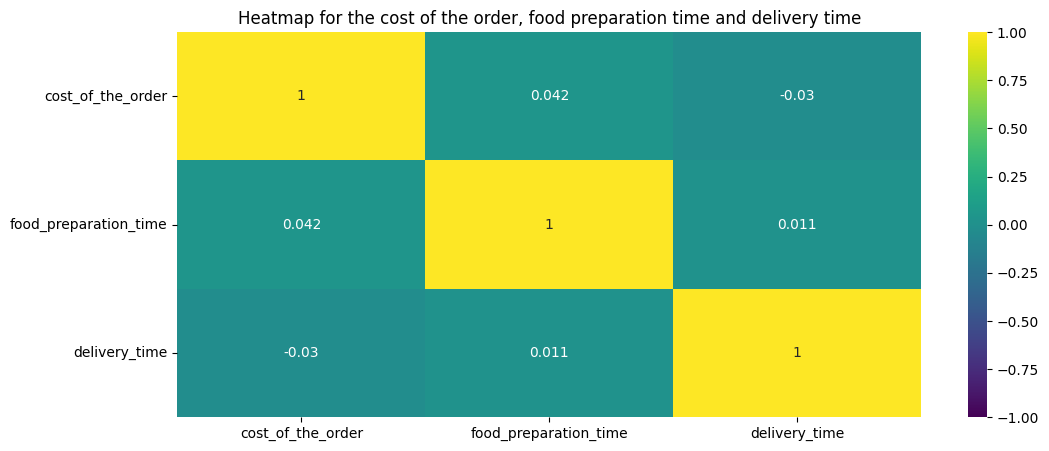

In [39]:
# Plotting the heatmap to visualize the correlations
plt.figure(figsize=(12, 5))
sns.heatmap(cor_num_col, cmap="viridis", annot=True, vmin=-1, vmax=1 )
plt.title('Heatmap for the cost of the order, food preparation time and delivery time')
plt.show()

#### Observations:
1. Cost of order, food preparation time and delivery time are not strongly correlated.
2. Cost of the order and delivery time are negatively correlated (-0.03).
3. Cost of the order and food preparation time have a weak positive correlation (0.042).
4. Food preparation time and delivery time have a weak positive correlation. (0.011)

## Cost of the Order vs Cusine Type

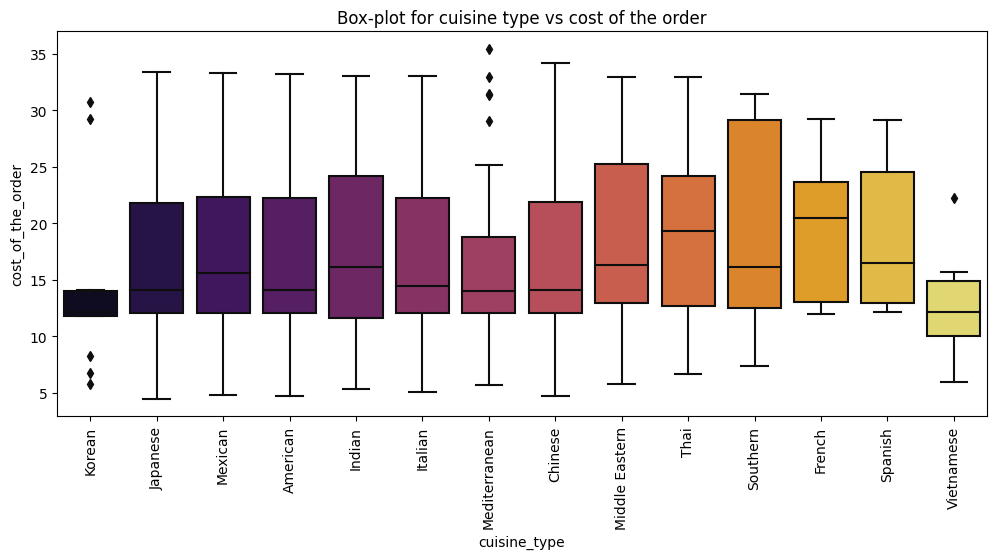

In [40]:
# Determining the relationship between cuisine type and cost of the order
plt.figure(figsize=(12,5))
sns.boxplot(data = df, x = "cuisine_type", y = "cost_of_the_order", palette = 'inferno')
plt.title('Box-plot for cuisine type vs cost of the order')
plt.xticks(rotation = 90)
plt.show()

In [41]:
# Determining the sales made from each of the cuisine types
df.groupby(['cuisine_type'])['cost_of_the_order'].sum().sort_values(ascending = False)

cuisine_type
American          9530.78
Japanese          7663.13
Italian           4892.77
Chinese           3505.62
Mexican           1303.85
Indian            1235.14
Middle Eastern     922.21
Mediterranean      711.84
Thai               364.95
French             356.29
Southern           328.11
Spanish            227.93
Korean             182.02
Vietnamese          90.18
Name: cost_of_the_order, dtype: float64

#### Observations:
1. There exist outliers in the cost of the orders for Korean, Mediterranian and Vietnamese cuisine types.
2. The highest sales where made from the American cuisine type 9,530.78 dollars and the least sales were from Vietnamese cuisine type 90.18 dollars

## Cost of the Order vs Rating

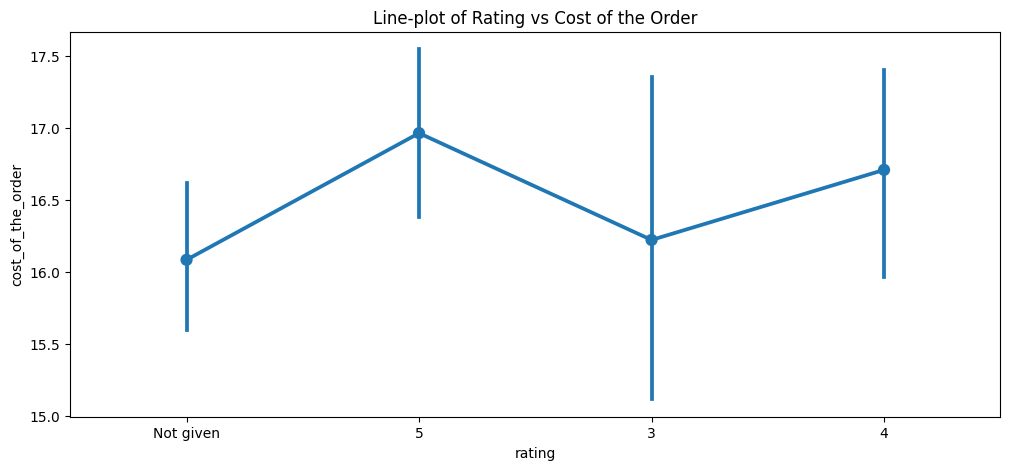

In [42]:
# Determining the relationship between rating and cost of the order
plt.figure(figsize=(12, 5))
sns.pointplot(data = df, x = 'rating', y = 'cost_of_the_order')
plt.title('Line-plot of Rating vs Cost of the Order')
plt.show()

#### Observations:
Orders with the highest rating of 5 have a higher means of costs of the the order.

##  Cost of the Order vs Restaurant Name

In [43]:
# Determining the sales made by each of the restaurants
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False)

restaurant_name
Shake Shack                   3579.53
The Meatball Shop             2145.21
Blue Ribbon Sushi             1903.95
Blue Ribbon Fried Chicken     1662.29
Parm                          1112.76
                               ...   
Market Table                     6.79
Wa Jeal                          6.74
Cipriani Le Specialita           5.92
Big Wong Restaurant _¤¾Ñ¼       5.92
Hunan Manor                      5.72
Name: cost_of_the_order, Length: 178, dtype: float64

#### Observations:
Shake Shack is the restaurant with the highest sales/revenues of 3,579 dollars while Hunam Manor has the least sales of 5.72 dollars.

## Food Preparation Time vs Cuisine Type

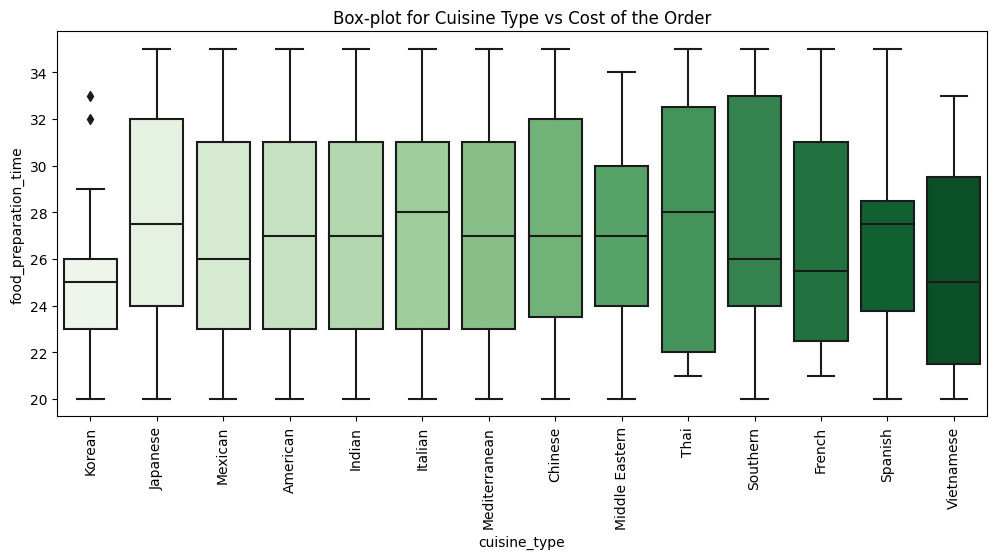

In [44]:
# Determining the relationship between cuisine type and food preparation time
plt.figure(figsize=(12,5))
sns.boxplot(data = df, x = "cuisine_type", y = "food_preparation_time", palette = 'Greens')
plt.title('Box-plot for Cuisine Type vs Cost of the Order')
plt.xticks(rotation = 90)
plt.show()

#### Observations:
Korean cuisine type has outliers in the food preparation time data.

## Food Preparation Time vs Rating

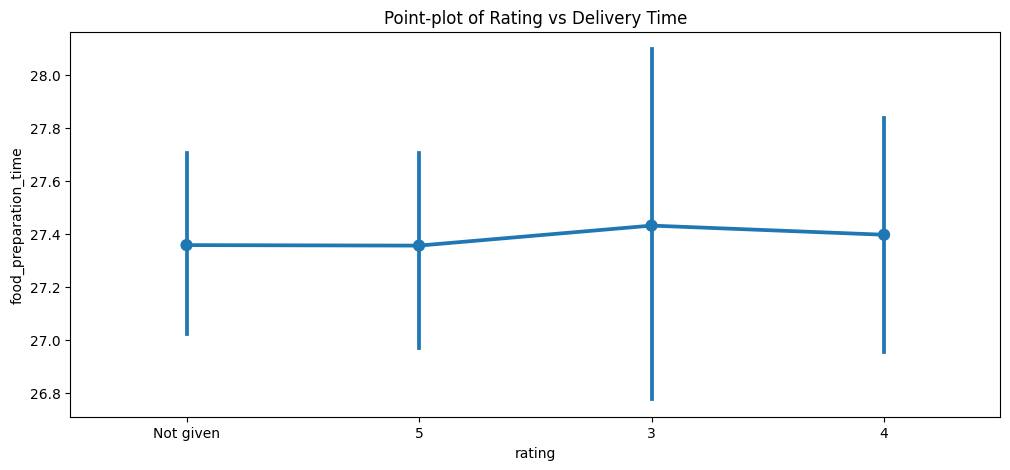

In [45]:
# Determining the relationship between rating and food preparation time
plt.figure(figsize=(12, 5))
sns.pointplot(data = df, x = 'rating', y = 'food_preparation_time')
plt.title('Point-plot of Rating vs Delivery Time')
plt.show()

#### Observations:
The means of food preparation time are almost equal across the different rating categories, the means with rating 3 being slightly higher.

## Delivery Time vs Rating

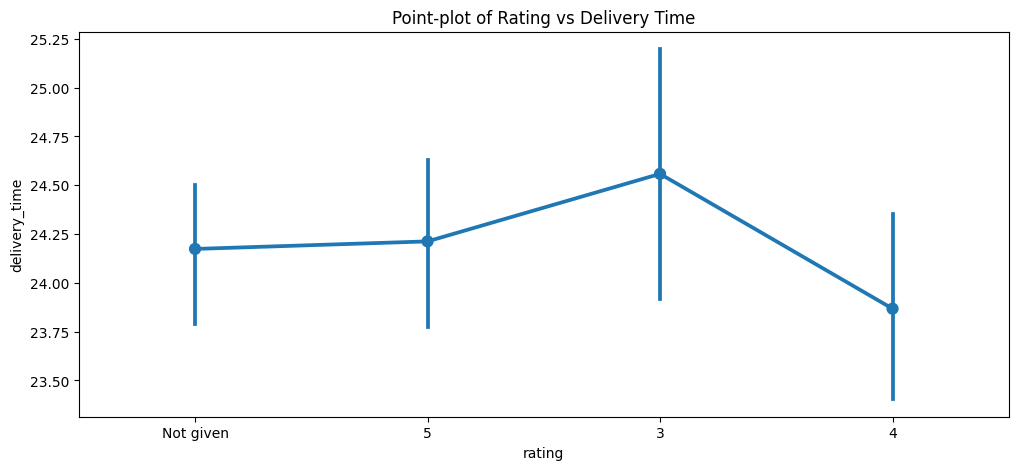

In [46]:
# Determining the relationship between rating and delivery time
plt.figure(figsize=(12, 5))
sns.pointplot(data = df, x = 'rating', y = 'delivery_time')
plt.title('Point-plot of Rating vs Delivery Time')
plt.show()

#### Observations:
The means of delivery time are higher for orders with a rating of 3

## Delivery time vs Day of the week

<ipython-input-47-44c7bdf75923>:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data = df, x = 'day_of_the_week', y = 'delivery_time', jitter = True, palette ='bright')


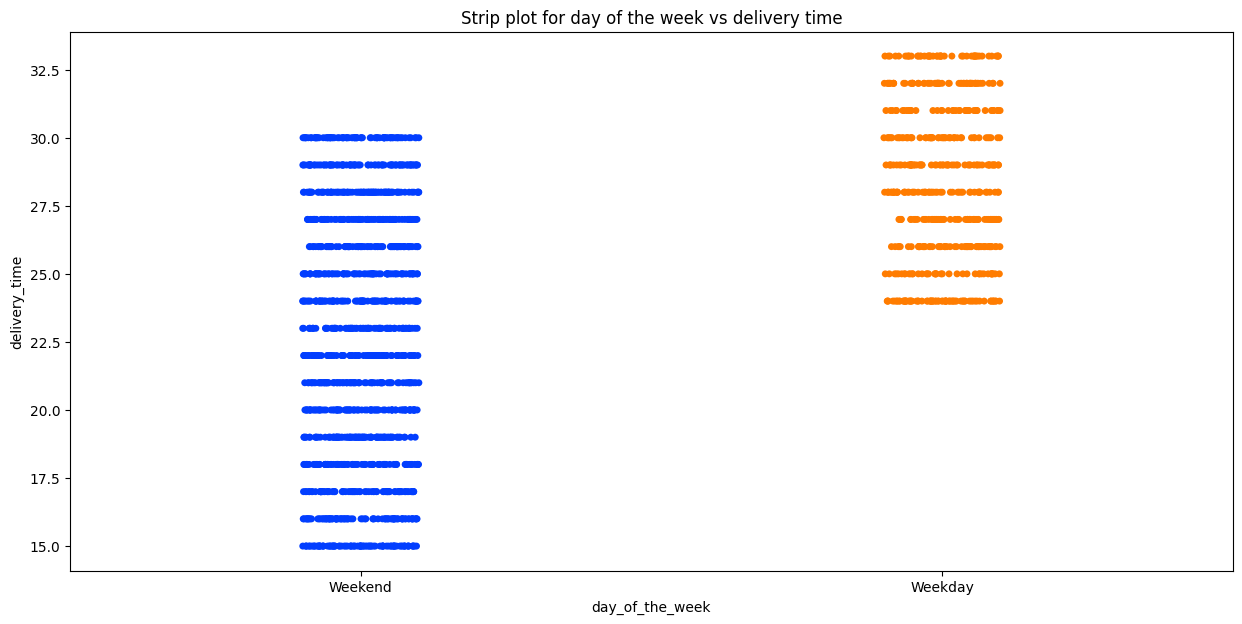

In [47]:
# Determining the relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.stripplot(data = df, x = 'day_of_the_week', y = 'delivery_time', jitter = True, palette ='bright')
plt.title('Strip plot for day of the week vs delivery time')
plt.show()

#### Observations:
1. There are no outliers in the delivery time for orders delivered on weekends and during the weekdays.
2. The mean delivery time during the weekdays is higher than during the weekends.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [48]:
# obtaining the rated restaurants
df_rated = df[df['rating']!='Not given'].copy()
df_rated['rating'] = df_rated['rating'].astype('int') # Converting the rating column from object to integer data type

# Creating a dataframe containing the restaurant names and the counts of their rating
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()

# Obtaining the names of restaurants with rating count of more than 50
restaurants_with_over_50_ratings = df_rating_count[df_rating_count['rating']>50]['restaurant_name']
restaurants_with_over_50_ratings.head()


0                  Shake Shack
1            The Meatball Shop
2            Blue Ribbon Sushi
3    Blue Ribbon Fried Chicken
Name: restaurant_name, dtype: object

In [49]:
df_rating_count[df_rating_count['rating']>50]

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64


In [50]:
# obtaining a record of restaurants with over 50 rating counts
rec_restaurants_with_over_50_ratings = df_rated[df_rated['restaurant_name'].isin(restaurants_with_over_50_ratings)]

In [51]:
# calculating the mean rating of each restaurant
rec_restaurants_with_over_50_ratings.groupby(['restaurant_name'])['rating'].mean().reset_index()

,restaurant_name,rating
0,Blue Ribbon Fried Chicken,4.328125
1,Blue Ribbon Sushi,4.219178
2,Shake Shack,4.278195
3,The Meatball Shop,4.511905


#### Observations:
The restaurants that are eligible for the promotional offer by having the rating counts of more than 50 and average rating being greater than 4 are as follows.
1. 	Blue Ribbon Fried Chicken
2.	Blue Ribbon Sushi
3.	Shake Shack
4.	The Meatball Shop

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [52]:
# creating a function to determine the company revenue
def company_revenue(r):
    if r > 20:
        return r*0.25
    elif r > 5:
        return r*0.15
    else:
        return r*0

df['Company_Revenue'] = df['cost_of_the_order'].apply(company_revenue)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Company_Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [53]:
# computing the total revenue
Company_Revenue_Total = df['Company_Revenue'].sum()
print('The net revenue generated by the company is : $', round(Company_Revenue_Total, 2))

The net revenue generated by the company is : $ 6166.3


#### Observations:
The net revenue generate by the company across all its orders is 6,166.3 dollars.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [54]:
# Calculating total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

In [55]:
# calculating the percentage of orders with over 60 minutes total delivery time
percentage_over_60 = (df[df['total_time']>60].shape[0] / df.shape[0]) * 100
print('Percentage of orders above 60 minutes of the total delivery time:',round(percentage_over_60 , 2),'%')

Percentage of orders above 60 minutes of the total delivery time: 10.54 %


#### Observations:
10.54% of the orders take more than 60 minutes to get delivered from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [56]:
# The mean delivery time of weekdays
mean_del_time_weekdays = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
print('The mean delivery time on weekdays is:',round(mean_del_time_weekdays,2),'minutes')

The mean delivery time on weekdays is: 28.34 minutes


In [57]:
# The mean delivery time of weekends
mean_del_time_weekends = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
print('The mean delivery time on weekends is:',round(mean_del_time_weekends,2),'minutes')

The mean delivery time on weekends is: 22.47 minutes


#### Observations:
The mean delivery time during the weekdays is 28.34 minutes and decreases to 22.47 minutes during the weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
-	American cuisine type is the most ordered food while Vietnamese is the least ordered food from Foodhub.
-	Most of the orders are made during the weekends.
-	The average cost per order is 16.49 dollars
-	The average delivery time for orders made is 24.16 minutes.
-	Generally, there is a high customer satisfaction basing on the ratings received.

### Recommendations:

*  The company should focus more on the American cuisine and on some few other brands such as Japanese and Italian cuisine since this are the leading in revenue generation.
*	The company should offer loyalty programs so as to reward repeat customers.
*	The company should provide more offers on the weekends so as to further improve their sales.
*	Focus on customer satisfaction so as to increase the number of orders received through either repeat customers or referrals.
*	The company should further improve on their delivery time by ensuring that orders are prepared and delivered on time.


---